>[Import Libraries and Dataset](#scrollTo=3vLk4RYkGJik)

>[Level 1: Data Preprocessing](#scrollTo=lNReeFIJHIIy)

>>[Checking null values](#scrollTo=Lxoc_9HgVBZi)

>>[Shape](#scrollTo=fQRhF7MtHQGZ)

>>[Checking For Class Imbalance](#scrollTo=BN8-Z5gG9lVS)

>>[One-Hot-Encoding and Label Encoding](#scrollTo=ile_VemiIHC7)

>>[Checking Duplicates](#scrollTo=fQ5ncEQ06lnY)

>>[Dataset Info and Describe](#scrollTo=4tAwc5sgUSFK)

>>[Checking outliers](#scrollTo=1BcQH1-oYFF6)

>>[Correlation](#scrollTo=OCQpdrSdjoYy)

>[Level 2: Feature Engineering](#scrollTo=F_m16CemlMdb)

>>[Creating New Features](#scrollTo=uX1rW3w-wuDF)

>>[Feature Selection](#scrollTo=2l_CXQgHyoFR)

>>>[Gender](#scrollTo=Bcs9kSn2BhCd)

>>>[Countries](#scrollTo=h61v6ZiICbqM)

>>[Normalizarion](#scrollTo=L8KlXd-BoW8R)

>[Level 3: Clustering](#scrollTo=xDo16rQ2zvUI)

>>[Step 1](#scrollTo=6Q_zgGVTz3NA)

>>>[K = 3, 6, 9](#scrollTo=O3lWKdWR3xL-)

>>[Step 2](#scrollTo=h3t17fTDz7EA)

>>>[Elbow](#scrollTo=ra-oOEEHKfkL)

>>[Step 3](#scrollTo=IdqoA3gUz8zB)

>>[Step 4 (DB Scan)](#scrollTo=McGycfSmgP0f)

>[Level 5](#scrollTo=YyIhGjZbLiYe)

>>[Silhouettee Average Score](#scrollTo=DAvmg0dt1xUm)

>>[Visualization](#scrollTo=8kFKbre-9TDY)



# Import Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
import torch
from scipy.cluster.hierarchy import fcluster

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Uni_Sem01/Assignment03/Customer_Analysis.csv')

In [ ]:
dataset

,Unnamed: 0,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel
0,0,1,56,Male,UK,83094,5,8,5,Low,Bronze
1,1,2,69,Male,UK,86860,10,2,8,Medium,Gold
2,2,3,46,Female,USA,60173,8,10,18,Medium,Silver
3,3,4,32,Female,UK,73884,7,10,16,Low,Gold
4,4,5,60,Male,UK,97546,6,4,13,Low,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
38439,38439,38440,55,Female,USA,80880,6,3,14,High,Silver
38440,38440,38441,44,Male,Canada,42845,5,10,1,Low,Silver
38441,38441,38442,43,Female,USA,71433,7,9,7,Medium,Bronze
38442,38442,38443,28,Female,USA,105587,7,5,16,High,Silver


# Level 1: Data Preprocessing

## Checking null values

In [ ]:
print(f"There are {len(dataset) - len(dataset.dropna())} null values in dataset")

There are 0 null values in dataset


## Shape

In [ ]:
dataset.drop(['Unnamed: 0', 'CustomerID'], axis=1, inplace=True)
print(f"The dataset has {dataset.shape[0]} rows and {dataset.shape[1]} column")

The dataset has 38444 rows and 9 column


## Checking For Class Imbalance

In [ ]:
gender_counts = dataset['Gender'].value_counts()
gender_counts

,count
Gender,
Female,19294
Male,19150


In [ ]:
country_counts = dataset['Country'].value_counts()
country_counts

,count
Country,
USA,7762
France,7707
Canada,7693
Germany,7654
UK,7628


In [ ]:
loyalty_counts = dataset['LoyaltyLevel'].value_counts()
loyalty_counts

,count
LoyaltyLevel,
Gold,12912
Bronze,12804
Silver,12728


- `The distributions are almost the same`

## One-Hot-Encoding and Label Encoding

`For "Gender" and "Country" we use One-Hot-Encoding because there is no priority for them. But on the other hand we use Label encoding for "FeedbackScore" and "LoyaltyLevel" because there is priority among them.`

In [ ]:
print(f"For Gender: {dataset['Gender'].unique()}")
print(f"For Country: {dataset['Country'].unique()}")
print(f"For FeedbackScore: {dataset['FeedbackScore'].unique()}")
print(f"For LoyaltyLevel: {dataset['LoyaltyLevel'].unique()}")

For Gender: ['Male' 'Female']
For Country: ['UK' 'USA' 'France' 'Germany' 'Canada']
For FeedbackScore: ['Low' 'Medium' 'High']
For LoyaltyLevel: ['Bronze' 'Gold' 'Silver']


In [ ]:
FeedbackScore_encoder = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}

LoyaltyLevel_encoder = {
    'Bronze': 1,
    'Silver': 2,
    'Gold': 3
}

dataset['FeedbackScore'] = dataset['FeedbackScore'].map(FeedbackScore_encoder)
dataset['LoyaltyLevel'] = dataset['LoyaltyLevel'].map(LoyaltyLevel_encoder)
dataset = pd.get_dummies(dataset, columns=['Gender', 'Country'], drop_first=True, dtype=int)

In [ ]:
dataset

,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,Gender_Male,Country_France,Country_Germany,Country_UK,Country_USA
0,56,83094,5,8,5,1,1,1,0,0,1,0
1,69,86860,10,2,8,2,3,1,0,0,1,0
2,46,60173,8,10,18,2,2,0,0,0,0,1
3,32,73884,7,10,16,1,3,0,0,0,1,0
4,60,97546,6,4,13,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38439,55,80880,6,3,14,3,2,0,0,0,0,1
38440,44,42845,5,10,1,1,2,1,0,0,0,0
38441,43,71433,7,9,7,2,1,0,0,0,0,1
38442,28,105587,7,5,16,3,2,0,0,0,0,1


## Checking Duplicates

In [ ]:
print(f"There are {len(dataset) - len(dataset.drop_duplicates())} duplicates")

There are 0 duplicates


## Dataset Info and Describe

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                38444 non-null  int64
 1   Income             38444 non-null  int64
 2   ProductQuality     38444 non-null  int64
 3   ServiceQuality     38444 non-null  int64
 4   PurchaseFrequency  38444 non-null  int64
 5   FeedbackScore      38444 non-null  int64
 6   LoyaltyLevel       38444 non-null  int64
 7   Gender_Male        38444 non-null  int64
 8   Country_France     38444 non-null  int64
 9   Country_Germany    38444 non-null  int64
 10  Country_UK         38444 non-null  int64
 11  Country_USA        38444 non-null  int64
dtypes: int64(12)
memory usage: 3.5 MB


`There is no any null values in the features`

In [ ]:
dataset.describe()

,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,Gender_Male,Country_France,Country_Germany,Country_UK,Country_USA
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,43.496853,75076.619238,5.494746,5.492769,10.453881,2.003486,2.002809,0.498127,0.200473,0.199095,0.198418,0.201904
std,14.972748,25975.752966,2.873192,2.875812,5.765621,0.817656,0.817882,0.500003,0.400360,0.399325,0.398814,0.401426
min,18.000000,30001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,52624.500000,3.000000,3.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,75236.000000,5.000000,5.000000,10.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,97606.750000,8.000000,8.000000,15.000000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,69.000000,119999.000000,10.000000,10.000000,20.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 - `Key insights:`
  - `1) The average Age shows that our customers are middle age.`
  - `2) The differences between middle and mean for all the features are not significant so we predict that the outliers are not significant(we'll see the exact answer to this later).`
  - `3) The average of Gender and Countries shows that they almost(not exactly) are equally distributed.`

## Checking outliers

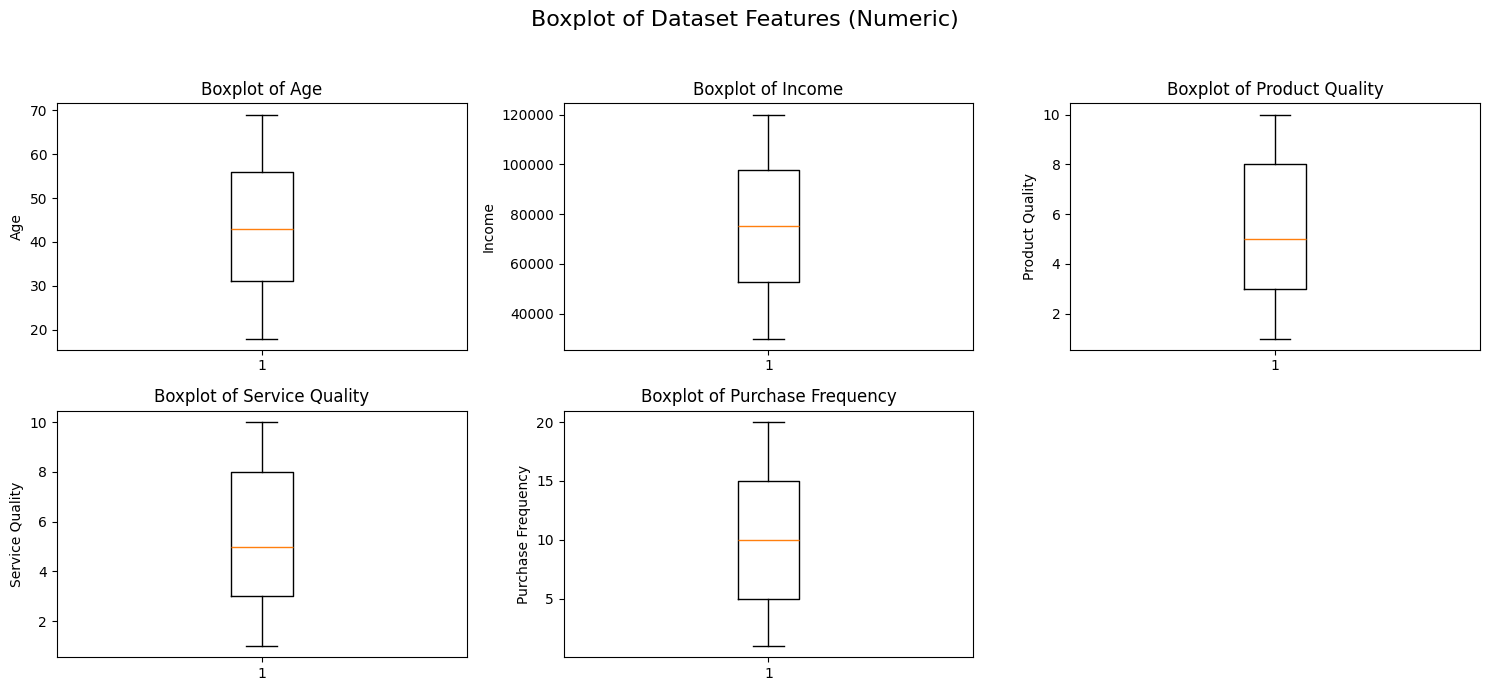

In [ ]:
temp_df = dataset[["Age", "Income", "ProductQuality", "ServiceQuality", "PurchaseFrequency"]]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 7))

ax1.boxplot(temp_df['Age'])
ax1.set_title('Boxplot of Age')
ax1.set_ylabel("Age")

ax2.boxplot(temp_df['Income'])
ax2.set_title('Boxplot of Income')
ax2.set_ylabel("Income")

ax3.boxplot(temp_df['ProductQuality'])
ax3.set_title('Boxplot of Product Quality')
ax3.set_ylabel("Product Quality")

ax4.boxplot(temp_df['ServiceQuality'])
ax4.set_title('Boxplot of Service Quality')
ax4.set_ylabel("Service Quality")

ax5.boxplot(temp_df['PurchaseFrequency'])
ax5.set_title('Boxplot of Purchase Frequency')
ax5.set_ylabel("Purchase Frequency")

fig.delaxes(ax6)

fig.suptitle('Boxplot of Dataset Features (Numeric)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

`As we can see there is no outlier in any of this features.`

## Correlation

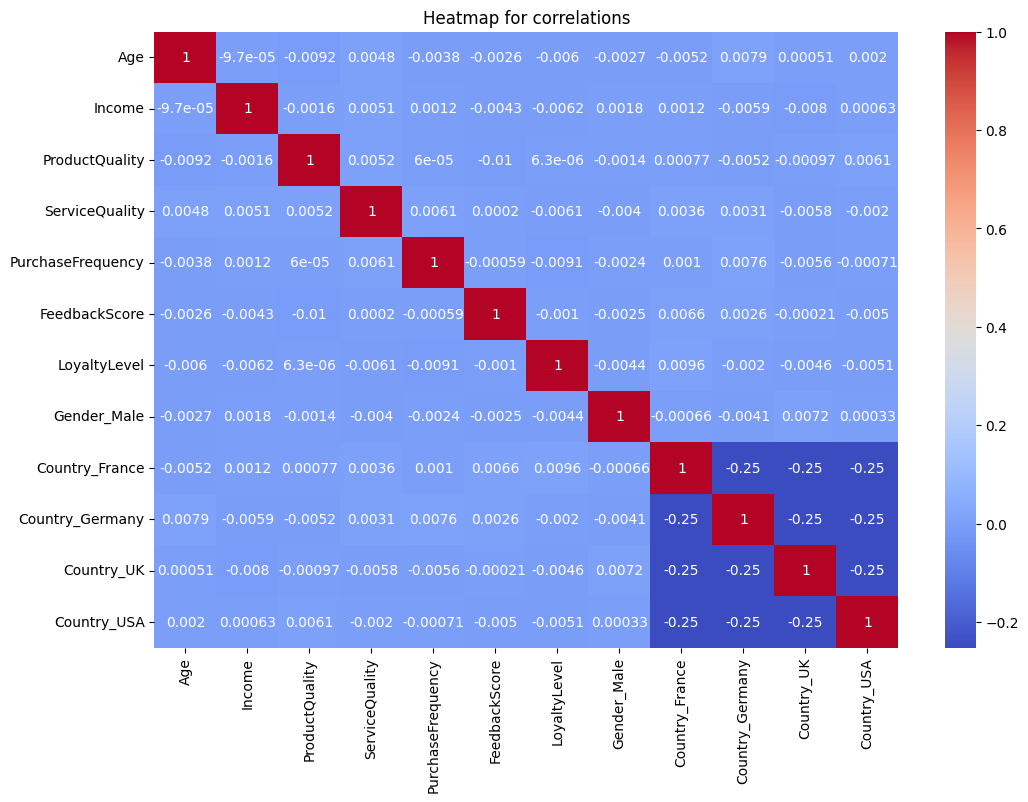

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap for correlations")
plt.show()

- `The correlation between features are almost zero.`

# Level 2: Feature Engineering

## Creating New Features

 - `Feature 1:`
  - `Company Performance = (ProductQuality + ServiceQuality)/2`

In [ ]:
dataset['CompanyPerformance'] = (dataset['ProductQuality'] + dataset['ServiceQuality']) / 2

- `Feature 2:`
    - `Customer Satisfaction = ( (LoyaltyLevel*7) + (FeedbackScore*7) + PurchaseFrequency ) / 3`

In [ ]:
dataset['CustomerSatisfaction'] = round((( dataset['LoyaltyLevel']*7 ) + ( dataset['FeedbackScore']*7 ) + dataset['PurchaseFrequency']) / 3, 2)

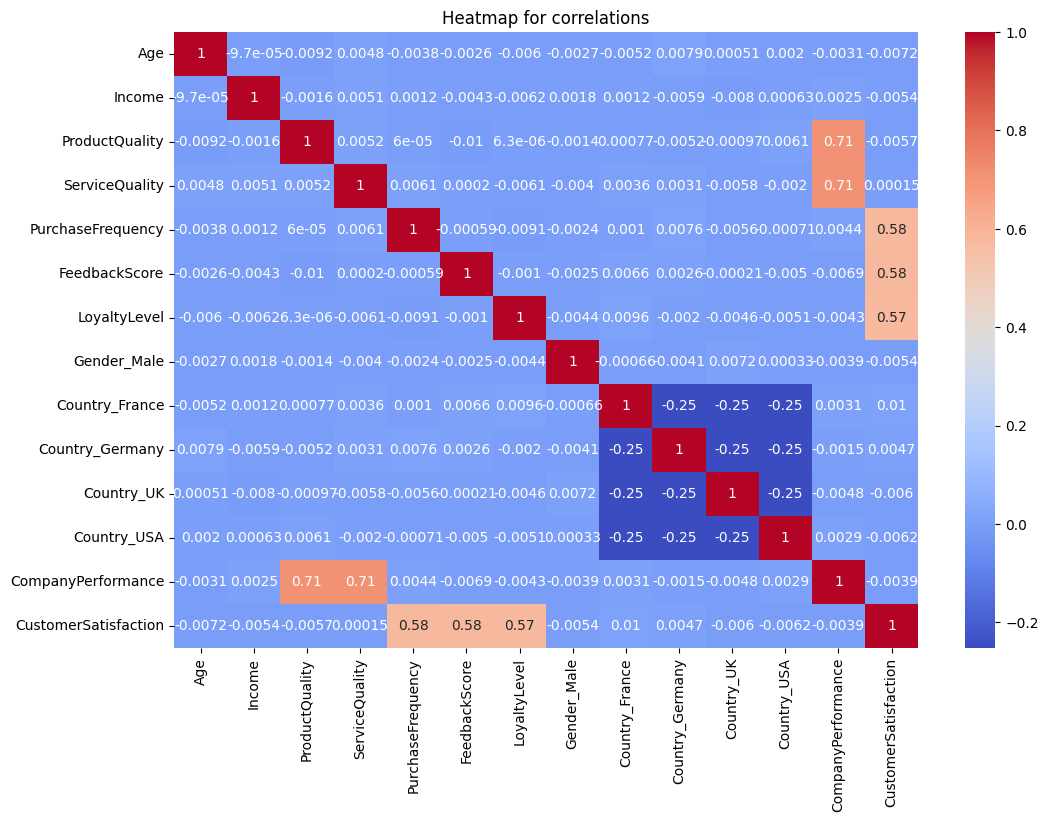

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap for correlations")
plt.show()

## Feature Selection

Let's decide about Gender and Country. It seems that they don't have any additional important information about our clustring purposes.

### Gender

In [ ]:
temp_df = dataset.groupby('Gender_Male')
temp_df.mean()

,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,Country_France,Country_Germany,Country_UK,Country_USA,CompanyPerformance,CustomerSatisfaction
Gender_Male,,,,,,,,,,,,,
0,43.537576,75031.329429,5.498860,5.504302,10.467814,2.005546,2.006375,0.200736,0.200736,0.195553,0.201773,5.501581,12.850406
1,43.455822,75122.249608,5.490601,5.481149,10.439843,2.001410,1.999217,0.200209,0.197441,0.201305,0.202037,5.485875,12.814780


- `As we can see the gender has not any effect on any feature, so we can remove it.`

### Countries

France

In [ ]:
temp_df = dataset.groupby('Country_France')
temp_df.mean()

,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,Gender_Male,Country_Germany,Country_UK,Country_USA,CompanyPerformance,CustomerSatisfaction
Country_France,,,,,,,,,,,,,
0,43.535999,75061.082409,5.493640,5.487556,10.450922,2.000781,1.998861,0.498292,0.249016,0.24817,0.25253,5.490598,12.816157
1,43.340729,75138.583106,5.499157,5.513559,10.465681,2.014273,2.018555,0.497470,0.000000,0.00000,0.00000,5.506358,12.898474


Germany

In [ ]:
temp_df = dataset.groupby('Country_Germany')
temp_df.mean()

,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,Gender_Male,Country_France,Country_UK,Country_USA,CompanyPerformance,CustomerSatisfaction
Country_Germany,,,,,,,,,,,,,
0,43.437545,75152.704157,5.502176,5.488340,10.432153,2.002436,2.003638,0.499156,0.250309,0.247743,0.252095,5.495258,12.824895
1,43.735432,74770.549909,5.464855,5.510583,10.541286,2.007708,1.999477,0.493990,0.000000,0.000000,0.000000,5.487719,12.863896


UK

In [ ]:
temp_df = dataset.groupby('Country_UK')
temp_df.mean()

,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,Gender_Male,Country_France,Country_Germany,Country_USA,CompanyPerformance,CustomerSatisfaction
Country_UK,,,,,,,,,,,,,
0,43.493056,75179.669782,5.496138,5.501071,10.470048,2.003570,2.004673,0.496333,0.250097,0.248377,0.251882,5.498605,12.842595
1,43.512192,74660.310173,5.489119,5.459229,10.388568,2.003146,1.995281,0.505375,0.000000,0.000000,0.000000,5.474174,12.792522


USA

In [ ]:
temp_df = dataset.groupby('Country_USA')
temp_df.mean()

,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,Gender_Male,Country_France,Country_Germany,Country_UK,CompanyPerformance,CustomerSatisfaction
Country_USA,,,,,,,,,,,,,
0,43.481781,75068.365491,5.485887,5.495698,10.455935,2.005541,2.004889,0.498044,0.25119,0.249462,0.248615,5.490793,12.842996
1,43.556429,75109.245040,5.529760,5.481190,10.445761,1.995362,1.994589,0.498454,0.00000,0.000000,0.000000,5.505475,12.791802


- `As we can see countries also don't have any additional information for our clustring because they are no differences between 0 and 1 for countries SO WE WILL DELETE THEM.`

In [ ]:
selected_dataset = dataset[["Age", "Income", "CompanyPerformance", "CustomerSatisfaction"]].copy()

## Normalizarion

In [ ]:
normalized_df = selected_dataset.copy()
scaler = StandardScaler()

normalized_df['Age'] = scaler.fit_transform(normalized_df[['Age']])
normalized_df['Income'] = scaler.fit_transform(normalized_df[['Income']])
normalized_df['CompanyPerformance'] = scaler.fit_transform(normalized_df[['CompanyPerformance']])
normalized_df['CustomerSatisfaction'] = scaler.fit_transform(normalized_df[['CustomerSatisfaction']])

In [ ]:
normalized_df

,Age,Income,CompanyPerformance,CustomerSatisfaction
0,0.835071,0.308653,0.493780,-1.969928
1,1.703326,0.453636,0.248422,0.453607
2,0.167182,-0.573759,1.720571,0.756549
3,-0.767862,-0.045913,1.475212,0.556607
4,1.102227,0.865025,-0.242295,-1.161073
...,...,...,...,...
38439,0.768282,0.223418,-0.487653,1.059491
38440,0.033605,-1.240851,0.984496,-1.666986
38441,-0.033184,-0.140272,1.229854,-1.061102
38442,-1.035017,1.174587,0.248422,1.262462


# Level 3: Clustering

## Step 1

### K = 3, 6, 9

For Normalized Dataset

For K = 3, the average silhouette score is 0.176


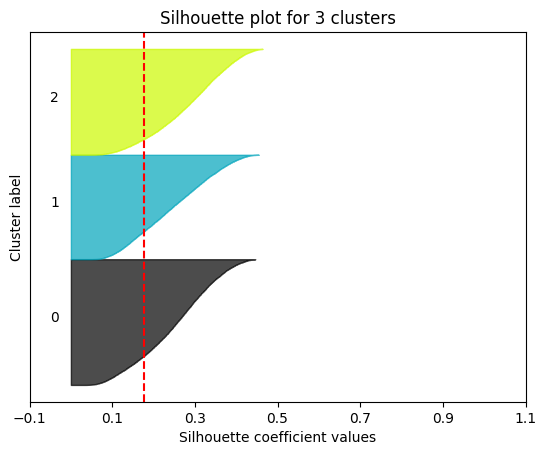

For K = 6, the average silhouette score is 0.207


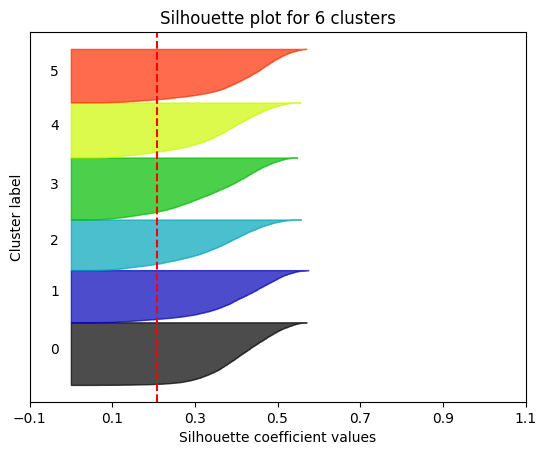

For K = 9, the average silhouette score is 0.293


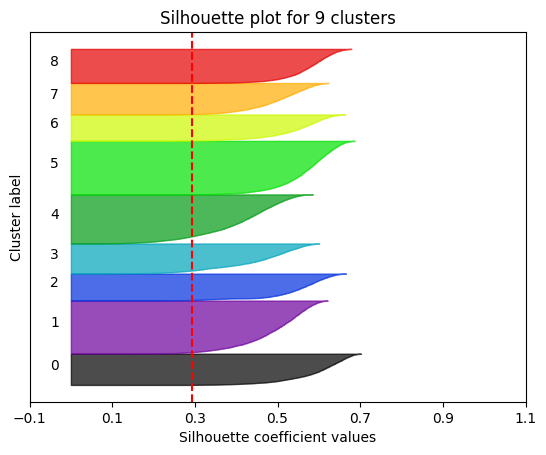

In [ ]:
K = [3, 6, 9]

i = 0
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=5).fit(normalized_df)
    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(normalized_df, cluster_labels)
    print(f"For K = {k}, the average silhouette score is {round(silhouette_avg, 3)}")

    normalized_df[f'clusters_sil(K={k})'] = cluster_labels

    # Calculate silhouette values
    sample_silhouette_values = silhouette_samples(normalized_df, cluster_labels)

    # Create a subplot
    fig, ax = plt.subplots()
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"Silhouette plot for {k} clusters")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()


For Selected Dataset

For K = 3, the average silhouette score is 0.59


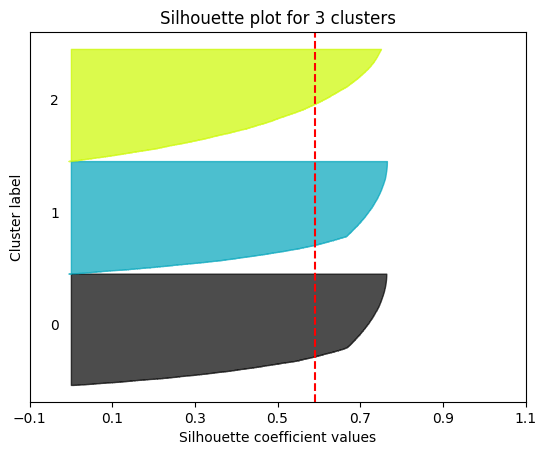

For K = 6, the average silhouette score is 0.554


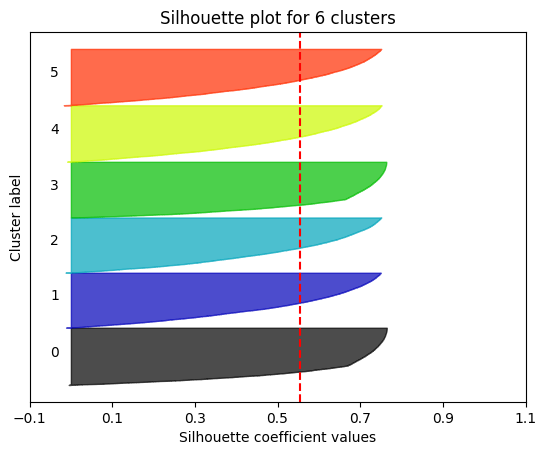

For K = 9, the average silhouette score is 0.543


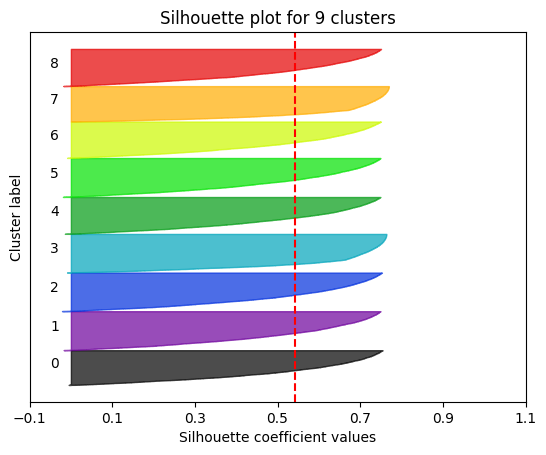

In [ ]:
K = [3, 6, 9]

i = 0
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=5).fit(selected_dataset)
    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(selected_dataset, cluster_labels)
    print(f"For K = {k}, the average silhouette score is {round(silhouette_avg, 3)}")

    selected_dataset[f'clusters_sil(K={k})'] = cluster_labels

    # Calculate silhouette values
    sample_silhouette_values = silhouette_samples(selected_dataset, cluster_labels)

    # Create a subplot
    fig, ax = plt.subplots()
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"Silhouette plot for {k} clusters")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()

selected_dataset.to_csv('Step1.csv', index=False)

- `Key Insights:`
 - `1) Silhouette average score is heigher when we don't use normalization.`
 - `2) K=3 resulted to highest silhouttee value amoung the others.`

In [ ]:
selected_dataset = dataset[["Age", "Income", "CompanyPerformance", "CustomerSatisfaction"]].copy()

## Step 2

### Elbow

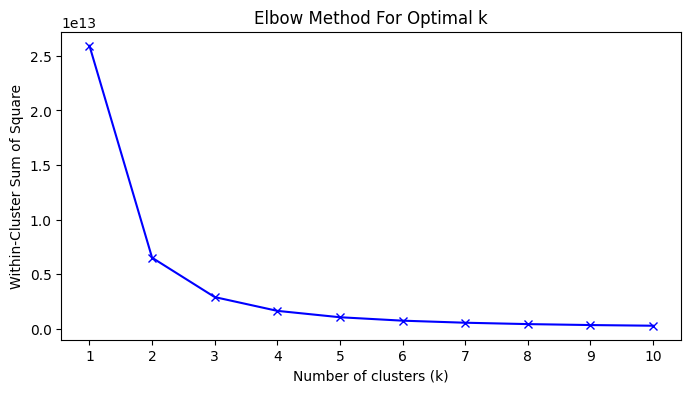

In [ ]:
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(selected_dataset)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.xticks(np.arange(1, 11, 1))
plt.ylabel('Within-Cluster Sum of Square')
plt.title('Elbow Method For Optimal k')
plt.show()

- `The plot shows that K=2, K=3 or K=4 is the best choice. Previously we computed the silhouettee for K=3, now we go with K=4 and K = 2.`

For K = 2, the average silhouette score is 0.626


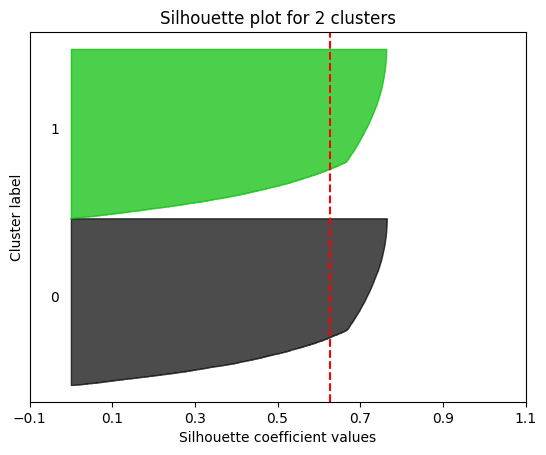

For K = 4, the average silhouette score is 0.572


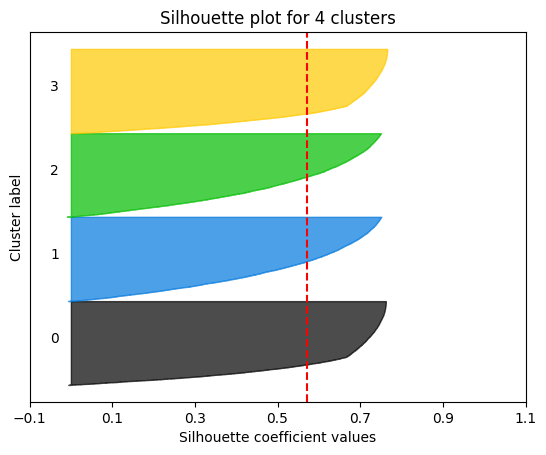

In [ ]:
K = [2, 4]

i = 0
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=5).fit(selected_dataset)
    cluster_labels = kmeans.labels_

    silhouette_avg = silhouette_score(selected_dataset, cluster_labels)
    print(f"For K = {k}, the average silhouette score is {round(silhouette_avg, 3)}")

    selected_dataset[f'clusters_sil(K={k})'] = cluster_labels

    # Calculate silhouette values
    sample_silhouette_values = silhouette_samples(selected_dataset, cluster_labels)

    # Create a subplot
    fig, ax = plt.subplots()
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"Silhouette plot for {k} clusters")
    ax.set_xlabel("Silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()

selected_dataset.to_csv('Step2.csv', index=False)

- `K=2 is the best choice based on silhouettee average score.`

In [ ]:
selected_dataset = dataset[["Age", "Income", "CompanyPerformance", "CustomerSatisfaction"]].copy()

## Step 3

Using device: cpu


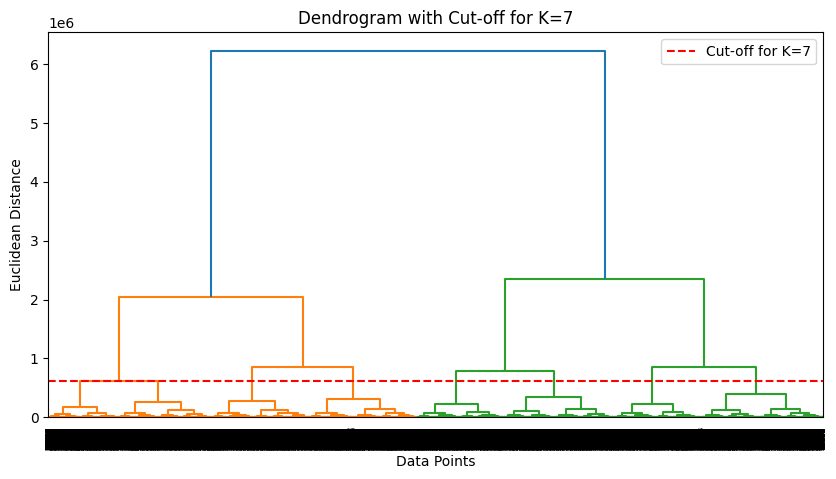

Clustering complete. Results saved to 'Step3.csv'.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

selected_dataset = selected_dataset.select_dtypes(include=[np.number])

dataset_tensor = torch.tensor(selected_dataset.values, dtype=torch.float32, device=device)

linkage_matrix = sch.linkage(dataset_tensor.cpu().numpy(), method='ward')

plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(linkage_matrix)
plt.axhline(y=linkage_matrix[-7, 2], color='red', linestyle='--', label="Cut-off for K=7")

plt.title("Dendrogram with Cut-off for K=7")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.legend()
plt.show()

cluster_labels = fcluster(linkage_matrix, 7, criterion='maxclust')

selected_dataset[f'clusters_Hier(K=7)'] = cluster_labels

hc = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(selected_dataset.drop(columns=[f'clusters_Hier(K=7)']))

selected_dataset[f'clusters_Agg(K=7)'] = y_hc

selected_dataset.to_csv('Step3.csv', index=False)

print("Clustering complete. Results saved to 'Step3.csv'.")

In [ ]:
selected_dataset = dataset[["Age", "Income", "CompanyPerformance", "CustomerSatisfaction"]].copy()

## Step 4 (DB Scan)


[0 1 2 3 4]
For K = 5, the average silhouette score is 0.435


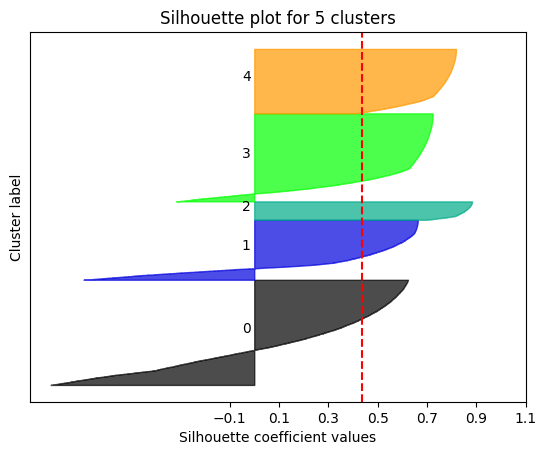

DBSCAN clustering results saved as 'Step4.csv'.


In [ ]:
dbscan = DBSCAN(eps=140, min_samples=95, metric='euclidean')  # Adjust parameters as needed
cluster_labels = dbscan.fit_predict(selected_dataset)

k = len(np.unique(cluster_labels))
print(np.unique(cluster_labels))
silhouette_avg = silhouette_score(selected_dataset, cluster_labels)

print(f"For K = {k}, the average silhouette score is {round(silhouette_avg, 3)}")

selected_dataset['Cluster(DBSCAN)'] = cluster_labels  # -1 represents noise (outliers)

# Calculate silhouette values
sample_silhouette_values = silhouette_samples(selected_dataset, cluster_labels)

# Create a subplot
fig, ax = plt.subplots()
y_lower = 10
for i in range(k):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title(f"Silhouette plot for {k} clusters")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")

ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.show()
selected_dataset.to_csv("Step4.csv", index=False)
print("DBSCAN clustering results saved as 'Step4.csv'.")

# Level 5

In [ ]:
step_1 = pd.read_csv('/content/Step1.csv')
step_2 = pd.read_csv('/content/Step2.csv')
step_3 = pd.read_csv('/content/Step3.csv')
step_4 = pd.read_csv('/content/Step4.csv')

## Silhouettee Average Score

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score_step1_k3 = silhouette_score(step_1[['Age', 'Income', 'CompanyPerformance', 'CustomerSatisfaction']], step_1['clusters_sil(K=3)'])
silhouette_score_step1_k6 = silhouette_score(step_1[['Age', 'Income', 'CompanyPerformance', 'CustomerSatisfaction']], step_1['clusters_sil(K=6)'])
silhouette_score_step1_k9 = silhouette_score(step_1[['Age', 'Income', 'CompanyPerformance', 'CustomerSatisfaction']], step_1['clusters_sil(K=9)'])
print(f'Silhouette Coefficient for STEP 1 with K=3: {silhouette_score_step1_k3}')
print(f'Silhouette Coefficient for STEP 1 with K=6: {silhouette_score_step1_k6}')
print(f'Silhouette Coefficient for STEP 1 with K=9: {silhouette_score_step1_k9}')


silhouette_score_step2_k2 = silhouette_score(step_2[['Age', 'Income', 'CompanyPerformance', 'CustomerSatisfaction']], step_2['clusters_sil(K=2)'])
silhouette_score_step2_k4 = silhouette_score(step_2[['Age', 'Income', 'CompanyPerformance', 'CustomerSatisfaction']], step_2['clusters_sil(K=4)'])
print(f'Silhouette Coefficient for STEP 2 with K=2: {silhouette_score_step2_k2}')
print(f'Silhouette Coefficient for STEP 2 with K=4: {silhouette_score_step2_k4}')


silhouette_score_step3 = silhouette_score(step_3[['Age', 'Income', 'CompanyPerformance', 'CustomerSatisfaction']], step_3['clusters_Agg(K=7)'])
print(f'Silhouette Coefficient for STEP 3 with K=7: {silhouette_score_step3}')

silhouette_score_step4 = silhouette_score(step_4[['Age', 'Income', 'CompanyPerformance', 'CustomerSatisfaction']], step_4['Cluster(DBSCAN)'])
print(f'Silhouette Coefficient for STEP 4(DBSCAN) with K=5: {silhouette_score_step4}')

Silhouette Coefficient for STEP 1 with K=3: 0.5901932583501398
Silhouette Coefficient for STEP 1 with K=6: 0.5541486815828874
Silhouette Coefficient for STEP 1 with K=9: 0.5427873409107288
Silhouette Coefficient for STEP 2 with K=2: 0.626369488734093
Silhouette Coefficient for STEP 2 with K=2: 0.5718836216600474
Silhouette Coefficient for STEP 3 with K=7: 0.5297954377207543
Silhouette Coefficient for STEP 4(DBSCAN) with K=5: 0.43515548123218584


 - `Based on the Silhouetee Coefficient Score, in step2 with k=2 and KMeans algorithm we reached at the highest score(0.6263)`

## Visualization

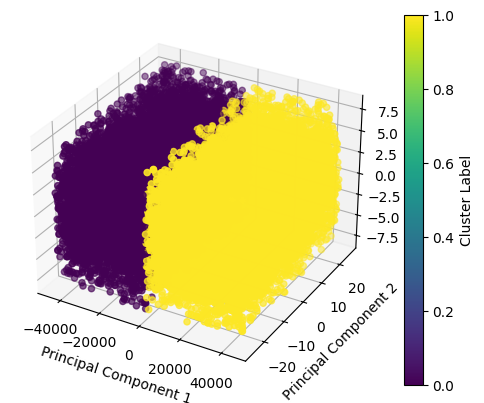

In [ ]:
features = step_2[['Age', 'Income', 'CompanyPerformance', 'CustomerSatisfaction']]
cluster_labels = step_2['clusters_sil(K=2)']

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the reduced features with cluster annotations
scatter = ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=cluster_labels, cmap='viridis')

# Add a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster Label')

# Label the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show the plot
plt.show()

- `KMeans Algorithm With K=2`


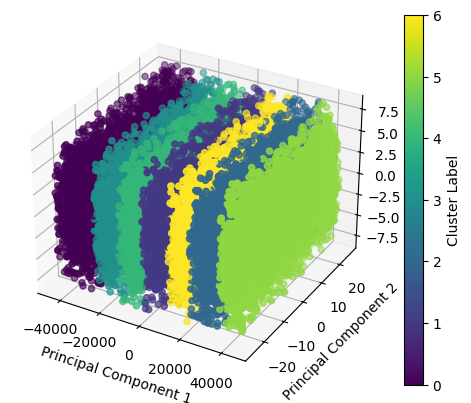

In [ ]:
features = step_3[['Age', 'Income', 'CompanyPerformance', 'CustomerSatisfaction']]
cluster_labels = step_3['clusters_Agg(K=7)']

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the reduced features with cluster annotations
scatter = ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=cluster_labels, cmap='viridis')

# Add a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster Label')

# Label the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show the plot
plt.show()

- `Hierarchical Clustering Algorithm With K=7`


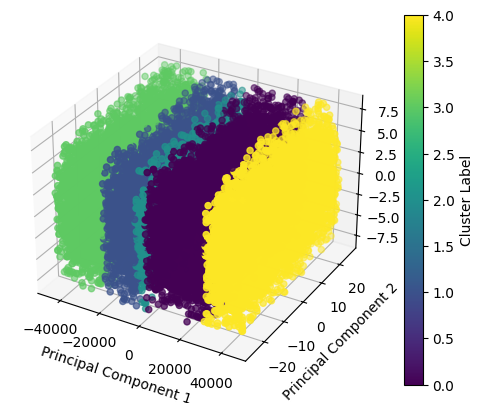

In [ ]:
features = step_4[['Age', 'Income', 'CompanyPerformance', 'CustomerSatisfaction']]
cluster_labels = step_4['Cluster(DBSCAN)']

pca = PCA(n_components=3)
reduced_features = pca.fit_transform(features)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the reduced features with cluster annotations
scatter = ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c=cluster_labels, cmap='viridis')

# Add a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster Label')

# Label the axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Show the plot
plt.show()

- `DBSCAN Algorithm With K=5`
